In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load datasets
df_purchase = pd.read_csv(r"data\User_product_purchase_details_p2.csv")
df_user = pd.read_csv(r"data\user_demographics.csv")

# Merge on User_ID
df = pd.merge(df_purchase, df_user, on="User_ID", how="left")

# Create binary target
df["High_Value_Purchase"] = (df["Purchase"] >= 10000).astype(int)

df.head()

,User_ID,Product_ID,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender,Age,Occupation,High_Value_Purchase
0,1000001,P00069042,A,2,0,3,NaN,NaN,8370,F,0-17,10,0
1,1000001,P00248942,A,2,0,1,6.0,14.0,15200,F,0-17,10,1
2,1000001,P00087842,A,2,0,12,NaN,NaN,1422,F,0-17,10,0
3,1000001,P00085442,A,2,0,12,14.0,NaN,1057,F,0-17,10,0
4,1000002,P00285442,C,4+,0,8,NaN,NaN,7969,M,55+,16,0


In [7]:
# Drop unnecessary columns
df = df.drop(["Product_ID"], axis=1)

# Handle missing values
df = df.fillna(0)

# Encode categorical variables
df = pd.get_dummies(df, columns=["Gender", "Age", "City_Category", 
                                 "Stay_In_Current_City_Years", 
                                 "Product_Category_1", 
                                 "Product_Category_2", 
                                 "Product_Category_3"], drop_first=True)

# Features and target
X = df.drop(["High_Value_Purchase", "Purchase"], axis=1)
y = df["High_Value_Purchase"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.8975584925554929


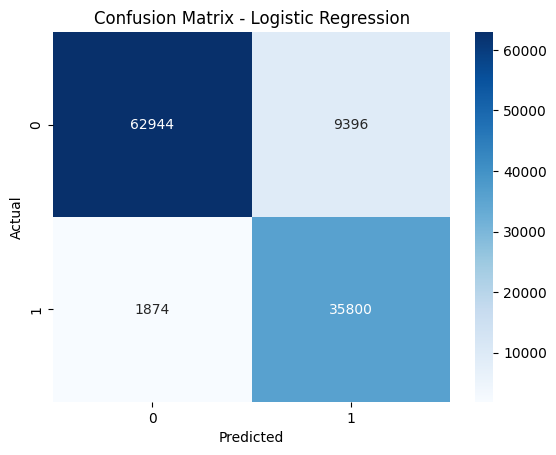

              precision    recall  f1-score   support

           0       0.97      0.87      0.92     72340
           1       0.79      0.95      0.86     37674

    accuracy                           0.90    110014
   macro avg       0.88      0.91      0.89    110014
weighted avg       0.91      0.90      0.90    110014



In [18]:
# Train Logistic Regression
log = LogisticRegression(max_iter=2000)
log.fit(X_train_scaled, y_train)

# Predictions
pred_lr = log.predict(X_test_scaled)

# Evaluation
acc_lr = accuracy_score(y_test, pred_lr)
cm_lr = confusion_matrix(y_test, pred_lr)
cr = classification_report(y_test, pred_lr)

print("Logistic Regression Accuracy:", acc_lr)

# Confusion Matrix Plot
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(cr)

In [21]:
# Build MLP
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["precision"])

# Train
history = model.fit(X_train_scaled, y_train, epochs=15, batch_size=32, validation_split=0.1, verbose=1)

# Evaluate
loss, acc_mlp = model.evaluate(X_test_scaled, y_test)
print("MLP Precision:", acc_mlp)
print(classification_report(y_test, (model.predict(X_test_scaled) > 0.5).astype("int32")))

c:\Users\User\Desktop\weekly2\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 10s 782us/step - loss: 0.2525 - precision: 0.7993 - val_loss: 0.2448 - val_precision: 0.8038
Epoch 2/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 725us/step - loss: 0.2455 - precision: 0.8007 - val_loss: 0.2422 - val_precision: 0.8026
Epoch 3/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 703us/step - loss: 0.2445 - precision: 0.8013 - val_loss: 0.2416 - val_precision: 0.8040
Epoch 4/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 720us/step - loss: 0.2438 - precision: 0.8027 - val_loss: 0.2409 - val_precision: 0.8051
Epoch 5/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 710us/step - loss: 0.2431 - precision: 0.8032 - val_loss: 0.2416 - val_precision: 0.8033
Epoch 6/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 706us/step - loss: 0.2426 - precision: 0.8043 - val_loss: 0.2415 - val_precision: 0.8056
Epoch 7/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 685us/step - loss: 0.2420 - precision: 0.8045 - val_loss: 0.2401 - val_precision: 0.8057
Epoch 8/15
12377/12377 ━━━━━━━━━━━━━━━━━━━━ 9s 

In [20]:
print(classification_report(y_test, (model.predict(X_test_scaled) > 0.5).astype("int32")))

3438/3438 ━━━━━━━━━━━━━━━━━━━━ 1s 382us/step
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     72340
           1       0.79      0.95      0.86     37674

    accuracy                           0.90    110014
   macro avg       0.88      0.91      0.89    110014
weighted avg       0.91      0.90      0.90    110014

